In [36]:
import pandas as pd
import numba
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df=pd.read_csv('/home/mitra/seaborn-data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.shape

(150, 5)

# Univariate

In [14]:
df_setosa=df.loc[df['species']=='setosa']
df_setosa

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [16]:
df_virginica=df.loc[df['species']=='virginica']
df_virginica

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [20]:
df_versicolor=df.loc[df['species']=='versicolor']
df_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


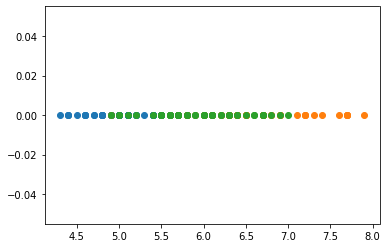

In [40]:
plt.plot(df_setosa['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_virginica['sepal_length'],np.zeros_like(df_virginica['sepal_length']),'o')
plt.plot(df_versicolor['sepal_length'],np.zeros_like(df_versicolor['sepal_length']),'o')

# Bivariate

## petal length, sepal width

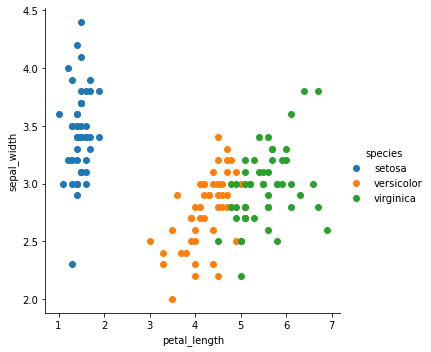

In [46]:
sns.FacetGrid(df,hue='species',height=5).map(plt.scatter,"petal_length","sepal_width").add_legend()

## sepal legth, petal width

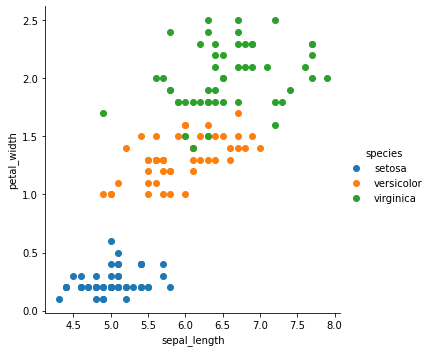

In [48]:
sns.FacetGrid(df,hue='species',height=5).map(plt.scatter,"sepal_length","petal_width").add_legend()

## Sepal length, petal length 

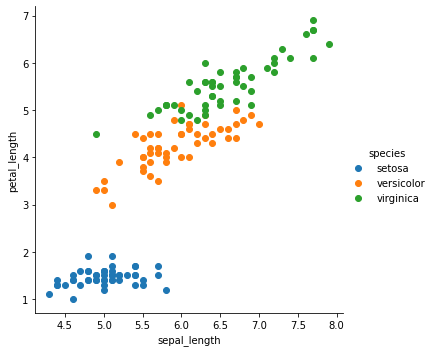

In [51]:
sns.FacetGrid(df,hue='species',height=5).map(plt.scatter,"sepal_length","petal_length").add_legend()

## petal width, petal width 

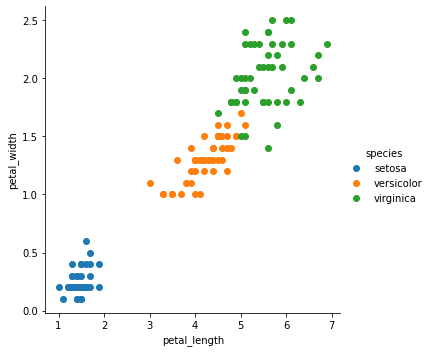

In [53]:
sns.FacetGrid(df,hue='species',height=5).map(plt.scatter,"petal_length","petal_width").add_legend()

# Multivariate

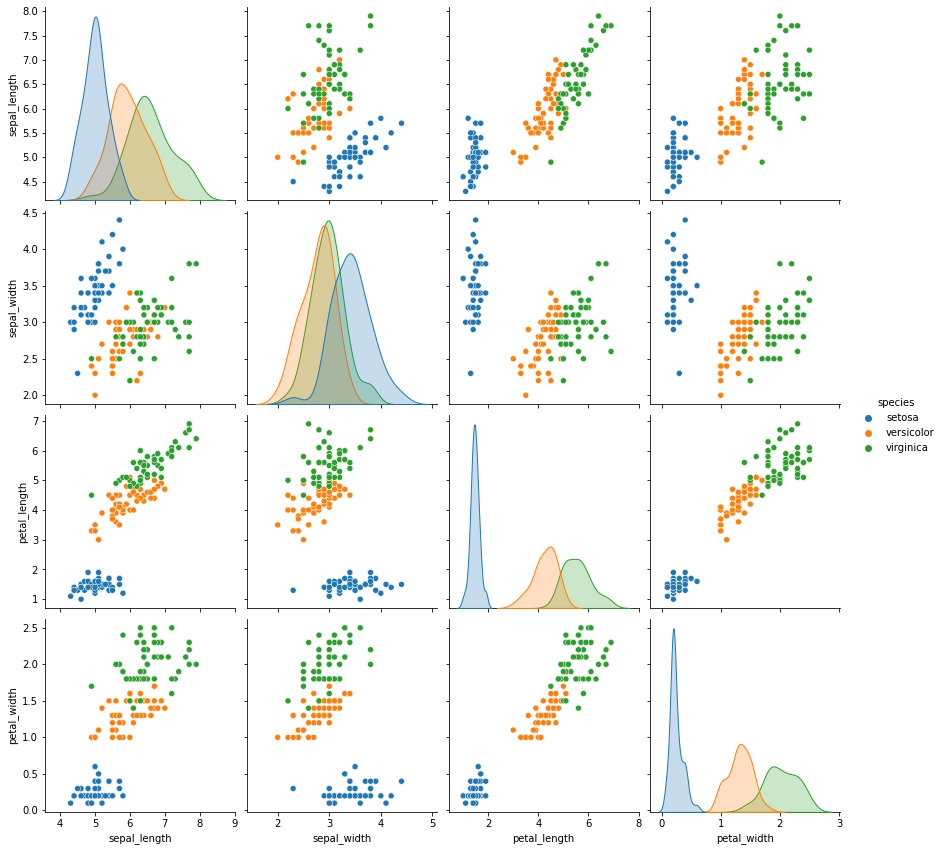

In [57]:
sns.pairplot(df,hue='species',height=3)